# Task 1

In [2]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p_hat = 95./100
z = 1.645

lower = np.round(p_hat - z * np.sqrt((0.95 * 0.05) / 100), 4)
upper = np.round(p_hat + z * np.sqrt((0.95 * 0.05) / 100), 4)

print(lower, upper)

0.9141 0.9859


In [4]:
p = 97./100
p > upper

False

In [5]:
new_lower = np.round(p - z * np.sqrt((p * (1 - p)) / 100), 4)
new_upper = np.round(p + z * np.sqrt((p * (1 - p)) / 100), 4)
print(new_lower, new_upper)

0.9419 0.9981


# Task 3

In [6]:
data = loadmat('Ex7_data/arcene.mat')
X_test = data['X_test']
X_train = data['X_train']
y_test = np.ravel(data['y_test'])
y_train = np.ravel(data['y_train'])
X_test.shape, y_test.shape

((100, 10000), (100,))

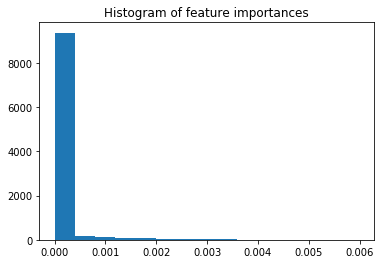

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

importances = model.feature_importances_
_ = plt.hist(importances, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of feature importances")
plt.show()

# Task 4

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFECV(model, step = 50)
rfe.fit(X_train, y_train)
sum(rfe.support_)

8600

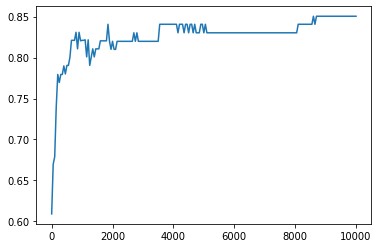

In [9]:
plt.plot(range(0,10001,50), rfe.grid_scores_)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

pred = rfe.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)

Accuracy: 0.84


# Task 5

In [29]:
from sklearn.model_selection import cross_val_score


accs = [0, 0, 0, 0, 0, 0]
Cs = (10000, 1000, 500, 100, 1, 0.01)

for i, C in enumerate(Cs):
    clf = LogisticRegression(random_state = 13, C = C, penalty = "l1")
    scores = cross_val_score(clf, X_train, y_train, cv = 10)
    accs[i] = np.round(scores.mean(), 3)
    
best_C = np.argmax(accs) 
print(accs)

[0.791, 0.82, 0.821, 0.8, 0.722, 0.667]


In [30]:
clf = LogisticRegression(random_state = 13, C = Cs[best_C], penalty = "l1")
clf.fit(X_train, y_train)

print(np.sum(clf.coef_ > 1e-9))

2567


In [31]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.83